# 维度灾难

原理：待补充

### 数据集加载
导入库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

随机生成 p 维的 n 个数据

In [11]:
def generate_data(p, n):
    """
    随机生成 p 维的 n 个数据
    :param p: 
    :param n: 
    :return: X 按行堆叠的数据
    """
    X = np.random.randn(n, p)
    return X

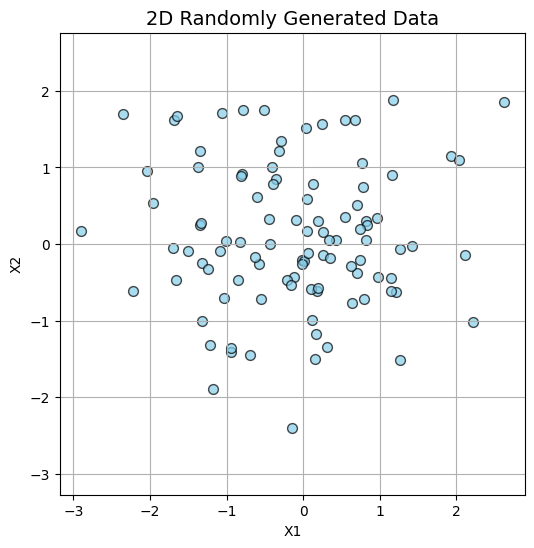

In [12]:
X = generate_data(2, 100)

# 可视化
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='skyblue', edgecolors='k', s=50, alpha=0.7)
plt.title("2D Randomly Generated Data", fontsize=14)
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.axis('equal')  # 让x、y比例一致
plt.show()

### 欧氏距离

In [5]:
def distance(X):
    """
    计算样本间欧式距离
    :param X: 样本集
    :return: 欧式距离矩阵 dist_matrix
    """
    diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1))
    return dist_matrix

In [6]:
X = np.array([[1, 2], [3, 4], [5, 6]])
dist_matrix = distance(X)
print(dist_matrix)

[[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]


### 余弦相似度距离

In [22]:
def cos_distance(X):
    """
    计算余弦相似度距离
    :param X: 样本集
    :return: 余弦相似度距离矩阵 dist_matrix
    """
    X_norm = X / np.linalg.norm(X, keepdims=True, axis=1)
    return 1 - X_norm @ X_norm.T

In [23]:
X = np.array([[1, 2], [3, 4], [5, 6]])
cos_sim_matrix = cos_distance(X)
print(cos_sim_matrix)

[[1.11022302e-16 1.61300899e-02 2.65828317e-02]
 [1.61300899e-02 0.00000000e+00 1.31233652e-03]
 [2.65828317e-02 1.31233652e-03 0.00000000e+00]]


### 测试
#### 欧氏距离随维度的变化

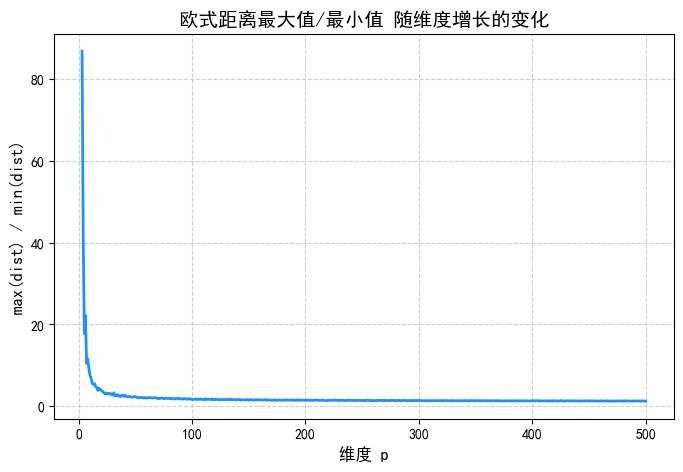

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False           # 解决负号显示问题
dist_rate = []
dims = range(3, 501)
for p in dims:
    X = generate_data(p, 200)
    dist_matrix = distance(X)
    mask = ~np.eye(dist_matrix.shape[0], dtype=bool)
    max_val = dist_matrix[mask].max()
    min_val = dist_matrix[mask].min()
    dist_rate.append(max_val / min_val)
    
# ----------------- 可视化 -----------------
plt.figure(figsize=(8, 5))
plt.plot(list(dims), dist_rate, color='dodgerblue', lw=2)
plt.title("欧式距离最大值/最小值 随维度增长的变化", fontsize=14)
plt.xlabel("维度 p", fontsize=12)
plt.ylabel("max(dist) / min(dist)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 余弦相似度距离随维度的变化

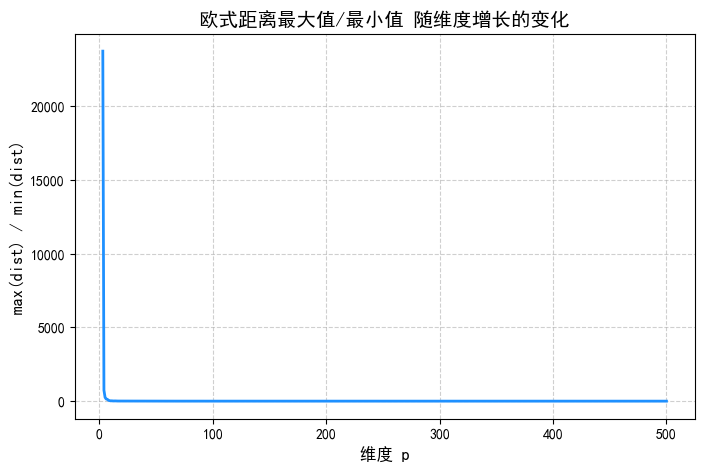

In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False           # 解决负号显示问题
dist_rate = []
dims = range(3, 501)
for p in dims:
    X = generate_data(p, 200)
    dist_matrix = cos_distance(X)
    mask = ~np.eye(dist_matrix.shape[0], dtype=bool)
    max_val = dist_matrix[mask].max()
    min_val = dist_matrix[mask].min()
    dist_rate.append(max_val / min_val)
    
# ----------------- 可视化 -----------------
plt.figure(figsize=(8, 5))
plt.plot(list(dims), dist_rate, color='dodgerblue', lw=2)
plt.title("欧式距离最大值/最小值 随维度增长的变化", fontsize=14)
plt.xlabel("维度 p", fontsize=12)
plt.ylabel("max(dist) / min(dist)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()